# Classifiers

In [38]:
# Important packages
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [39]:
df = pd.read_parquet('../Dataframes/df_EURUSD.parquet.gzip')

In [40]:
# Make date the index
df.index = df["date"]
df.drop(["date"], axis=1, inplace=True)

In [41]:
df.head()

,open,high,low,close,delta,slope_3,slope_4,slope_5,slope_10,slope_20,...,roc_13,roc_14,roc_15,wcp_15,macd_15_30,cci_15,hi_avg_2,lo_avg_2,hilo_avg_2,hilo_avg
date,,,,,,,,,,,,,,,,,,,,,
11/2/2000,0.9852,0.9880,0.9787,0.9870,1.0,-182.288029,-107.547908,110.180352,267.659617,-332.418693,...,-1.408451,-1.986097,-1.575588,0.989968,-0.008951,-18.604988,0.99210,0.98095,0.986525,0.98335
14/2/2000,0.9870,0.9915,0.9775,0.9782,0.0,-138.806852,-232.694564,-163.570730,243.455671,-326.011450,...,-2.238657,-2.287484,-2.859980,0.988890,-0.009095,-29.003535,0.98975,0.97810,0.983925,0.98450
15/2/2000,0.9782,0.9864,0.9764,0.9816,1.0,-117.589417,-229.011008,-290.630887,82.508251,-324.186875,...,-0.677932,-1.898861,-1.947857,0.987967,-0.008934,-28.932141,0.98895,0.97695,0.982950,0.98140
16/2/2000,0.9816,0.9873,0.9791,0.9865,1.0,-283.400810,-240.963855,-299.068878,-241.600482,-321.825656,...,0.941369,-0.182131,-1.409155,0.987577,-0.008434,22.823606,0.98685,0.97775,0.982300,0.98320
17/2/2000,0.9865,0.9952,0.9842,0.9881,1.0,187.686620,121.212121,192.351211,-27.659384,-293.587579,...,1.750592,1.105085,-0.020237,0.987742,-0.007860,102.152374,0.99125,0.98165,0.986450,0.98970


In [42]:
# Make df['delta'] the expected output
target = df['delta']
df.drop(['delta'], axis = 1, inplace = True)

In [43]:
# Features
feat_labels = ['open', 'high', 'low', 'close', 'wclose', 'so_3', 'so_4', 'so_5',
       'so_8', 'so_9', 'so_10', 'wr_6', 'wr_7', 'wr_8', 'wr_9', 'wr_10',
       'roc_12', 'roc_13', 'roc_14', 'roc_15', 'wcp_15', 'macd_15_30',
       'cci_15', 'hi_avg_2', 'lo_avg_2', 'hilo_avg_2', 'hilo_avg', 'slope_3',
       'slope_4', 'slope_5', 'slope_10', 'slope_20', 'slope_30']

## Random Forest Classifier

#### All features

In [44]:
# Train and Test samples
train_size = int(len(df) * 0.7)
X_train, X_test = df[:train_size], df[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

rf_model = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)

rf_model.fit(X_train, y_train)

print("RandomForest accuracy : ",accuracy_score(y_test, rf_model.predict(X_test), normalize = True))

RandomForest accuracy :  0.7627877237851662


#### Features Selection

In [45]:
top_n_features = 10

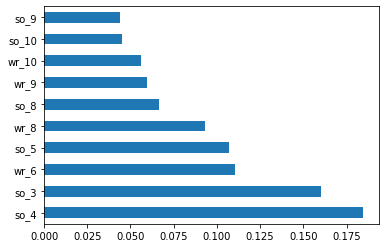

In [46]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(top_n_features).plot(kind='barh')
plt.show()

In [47]:
top_feats = list(feat_importances.nlargest(top_n_features).index)
df2 = df[top_feats]

#### Top N Features

In [48]:
# Train and Test samples
train_size = int(len(df2) * 0.7)
X_train, X_test = df2[:train_size], df2[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

rf_model = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)

rf_model.fit(X_train, y_train)

print("RandomForest accuracy : ",accuracy_score(y_test, rf_model.predict(X_test), normalize = True))

RandomForest accuracy :  0.7672634271099744


In [49]:
rf_pred = rf_model.predict(df2)

## Support Vector Machine Classifier (with RBF kernel)

In [50]:
# Train and Test samples
train_size = int(len(df) * 0.7)
X_train, X_test = df[:train_size], df[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

svm_model = SVC(kernel='rbf',random_state=0, gamma='auto')

svm_model.fit(X_train, y_train)

print("RBF-SVC accuracy : ",accuracy_score(y_test, svm_model.predict(X_test), normalize = True))

RBF-SVC accuracy :  0.4904092071611253


In [51]:
svm_pred = svm_model.predict(df)

## XGBoost

#### All Features

In [52]:
# Train and Test samples
train_size = int(len(df) * 0.7)
X_train, X_test = df[:train_size], df[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

boost_model = XGBClassifier()

boost_model.fit(X_train, y_train)

print("XGBoost accuracy : ",accuracy_score(y_test, boost_model.predict(X_test), normalize = True))

XGBoost accuracy :  0.8248081841432225


#### Features Selection

In [53]:
top_n_features = 10

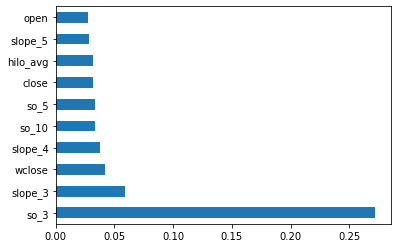

In [54]:
feat_importances = pd.Series(boost_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(top_n_features).plot(kind='barh')
plt.show()

In [55]:
top_feats = list(feat_importances.nlargest(top_n_features).index)
df2 = df[top_feats]

#### Top N Features

In [56]:
# Train and Test samples
train_size = int(len(df2) * 0.7)
X_train, X_test = df2[:train_size], df2[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

boost_model = XGBClassifier()

boost_model.fit(X_train, y_train)

print("XGBoost accuracy : ",accuracy_score(y_test, boost_model.predict(X_test), normalize = True))

XGBoost accuracy :  0.8222506393861893


In [57]:
boost_pred = boost_model.predict(df2)

## Logistic Regression to form meta classifier

In [58]:
dataset = pd.DataFrame({'RandomForest':rf_pred, 
                        #'SVM':svm_pred, 
                        'XGBoost':boost_pred}, 
                       columns=['RandomForest', 'XGBoost'])
dataset.head(n=5)

,RandomForest,XGBoost
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,1.0,1.0
4,1.0,1.0


In [59]:
# Train and Test samples
train_size = int(len(dataset) * 0.7)
X_train, X_test = dataset[:train_size], dataset[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

regressor = LogisticRegression(solver='lbfgs')

regressor.fit(X_train, y_train)

print("Logistic Regression accuracy : ",accuracy_score(y_test, regressor.predict(X_test), normalize = True))

Logistic Regression accuracy :  0.8222506393861893


In [60]:
# Note how the accuracy is exactly the same as the XGBoost accuracy, this means that the model is simply spitting out the XGBoost model predictions, as confirmed by the .coef_

In [61]:
regressor.coef_

array([[1.151739  , 9.90536172]])

In [62]:
ohls=df[['open','high','low','close']]

In [63]:
ohls.shape

(5212, 4)

In [64]:
ohls.head()

,open,high,low,close
date,,,,
11/2/2000,0.9852,0.9880,0.9787,0.9870
14/2/2000,0.9870,0.9915,0.9775,0.9782
15/2/2000,0.9782,0.9864,0.9764,0.9816
16/2/2000,0.9816,0.9873,0.9791,0.9865
17/2/2000,0.9865,0.9952,0.9842,0.9881


In [65]:
alpha_df=ohls[train_size:]

In [66]:
regressor.predict(X_test)

array([1., 1., 1., ..., 1., 1., 0.])

In [67]:
alpha_df['delta']=regressor.predict(X_test)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
alpha_df.head(n=10)

,open,high,low,close,delta
date,,,,,
5/2/2014,1.3519,1.3555,1.3499,1.3533,1.0
6/2/2014,1.3533,1.3619,1.3484,1.3590,1.0
7/2/2014,1.3590,1.3642,1.3552,1.3634,1.0
10/2/2014,1.3634,1.3651,1.3609,1.3646,1.0
11/2/2014,1.3646,1.3683,1.3630,1.3638,1.0
12/2/2014,1.3638,1.3653,1.3562,1.3593,0.0
13/2/2014,1.3593,1.3692,1.3585,1.3681,1.0
14/2/2014,1.3681,1.3715,1.3674,1.3688,1.0
17/2/2014,1.3688,1.3724,1.3688,1.3707,1.0


In [69]:
alpha_df.iloc[2]['delta']

1.0

In [70]:
capital=100000
cumulative_profit = 0
shares = 0
for i in range(len(alpha_df)):
    curr_delta=alpha_df.iloc[i]['delta']
    
    if i>0 and curr_delta==0 and (shares or alpha_df.iloc[i]['close']<alpha_df.iloc[i-1]['close']): # if shares at hand
        cumulative_profit+= (alpha_df.iloc[i]['close']-alpha_df.iloc[i-1]['close'])*shares
    
    
    if curr_delta == 0:
        capital += shares*alpha_df.iloc[i]['close']
        shares=0
    elif shares==0: # curr_delta is 1 and shares
        shares+=capital//alpha_df.iloc[i]['close']
        capital-=shares*alpha_df.iloc[i]['close']
        
print (capital,cumulative_profit,shares)

89997.58650000005 -106288.17649999997 0


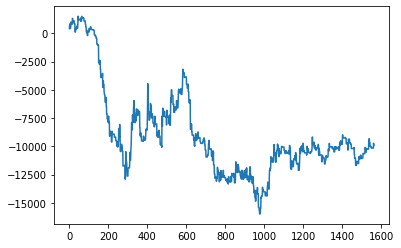

new capital:  90079.84241289491 cumulative_profit:  -9920.157587104964


In [71]:
capital=100000
cumulative_profit = 0
unit_per_trade = 1000
daily_pnl = []
for i in range(len(alpha_df)-1):
    curr_delta=alpha_df.iloc[i]['delta']
    shares = capital // alpha_df.iloc[i+1]['open']
    change = 0
    if curr_delta == 1:
        change = (alpha_df.iloc[i+1]['close']-alpha_df.iloc[i+1]['open']) * shares
        capital += change
        cumulative_profit += change
    else:
        change = ((alpha_df.iloc[i+1]['open']-alpha_df.iloc[i+1]['close'])/alpha_df.iloc[i+1]['open'])*unit_per_trade
        capital += change
        cumulative_profit += change
    daily_pnl.append(change)    
    
daily_pnl = np.array(daily_pnl)
plt.plot(daily_pnl.cumsum())
plt.show()
print ("new capital: ", capital, "cumulative_profit: ", cumulative_profit)

In [72]:
# calculate sharpe ratio

sharpe = np.sqrt(252) * (daily_pnl.mean()) / (daily_pnl.std())
sharpe

-0.31879530782279764

In [73]:
# calculate win/loss ratio

wins = 0
losses = 0

length = len(daily_pnl)

for i in range(length):
    if daily_pnl[i] > 0:
        wins += 1
    elif daily_pnl[i] < 0:
        losses += 1

wl = wins / losses
wl

0.9846153846153847

In [74]:
# maximum drawdown
cumsum = daily_pnl.cumsum()
maxm = 0
drawdown = 0
cur_low = 0
size = len(cumsum)

final_start = 0
final_end = 0

start_date = 0
end_date = 0

for i in range(1, size):
    cur_val = cumsum[i]
    if cur_val >= maxm:
        
        drawdown = max(drawdown, maxm - cur_low)
        
        if drawdown == maxm - cur_low:
            final_start = start_date
            final_end = end_date
            
        maxm = cur_val
        cur_low = cur_val
        
        start_date = i
    else:
        cur_low = min(cur_low, cur_val)
        if cur_low == cur_val:
            end_date = i

print('drawdown is:', drawdown, ', from day', final_start, ', to day', final_end)

drawdown is: 1208.333981895178 , from day 16 , to day 29
